Ahora estamos listos para comenzar nuestro camino para obtener información del conjunto de datos.

Supongamos que tienes un dataset de ventas de teléfonos móviles y quieres determinar los modelos de teléfonos más populares y la tienda con las ventas más altas. Puedes lograr esto fácilmente usando la agrupación. La agrupación te permite dividir los datos en grupos según ciertos criterios (en nuestro caso, modelos de teléfonos y tiendas).

Al final de esta lección, serás capaz de agrupar datos según criterios específicos y calcular la cantidad de elementos y su suma total en cada grupo.

¿Cuándo agrupar?

La agrupación se justifica cuando los datos caen lógicamente en grupos en función de una determinada característica y cuando los grupos son relevantes para la tarea en cuestión.

Por ejemplo, si tenemos datos sobre todos los artículos comprados en una tienda específica, podemos agrupar los datos por hora del día para identificar el tráfico máximo. O podríamos agrupar todas las compras por ID de cliente para calcular el tamaño de compra promedio, que es una métrica clave en el comercio minorista.

Etapas de la agrupación

Dividir. Primero, divide los datos en grupos según un criterio determinado.

Aplicar. A continuación, aplica métodos de cálculo a cada grupo, por ejemplo, puedes encontrar el número de elementos en un grupo con el método count() o la suma de sus valores con sum().

Combinar. Finalmente, los resultados son almacenados en una nueva estructura de datos.

Estas son las etapas estándar de agrupación y, afortunadamente para nosotros, pandas tiene métodos integrados para ellas.

Ejemplo

Analicemos algunos datos sobre exoplanetas para ver cómo funciona la agrupación en la práctica.

Los científicos ya han encontrado miles de estos planetas fuera de nuestro sistema solar utilizando telescopios en el espacio para enviar imágenes que luego son estudiadas por analistas de datos. Te mostraremos cómo encuentran planetas similares a la Tierra.

La tabla exoplanet almacena datos sobre miles de exoplanetas. Echa un vistazo a las primeras 30 filas:

import pandas as pd

exoplanet = pd.read_csv('/datasets/exoplanets.csv')

print(exoplanet.head(30))

            name      mass  radius  discovered
0    1RXS 1609 b  14.00000  1.7000        2008
1   2M 0122-24 b  20.00000  1.0000        2013
2   2M 2140+16 b  20.00000  0.9200        2010
3   2M 2206-20 b  30.00000  1.3000        2010
4       51 Peg b   0.47000  1.9000        1995
5       55 Cnc e   0.02703  0.1737        2004
6       CT Cha b  17.00000  2.2000        2008
7      CoRoT-1 b   1.03000  1.4900        2007
8     CoRoT-10 b   2.75000  0.9700        2010
9     CoRoT-11 b   2.33000  1.4300        2010
10    CoRoT-12 b   0.91700  1.4400        2010
11    CoRoT-13 b   1.30800  0.8850        2010
12    CoRoT-14 b   7.60000  1.0900        2010
13    CoRoT-15 b  63.40000  1.1200        2010
14    CoRoT-16 b   0.53500  1.1700        2010
15    CoRoT-17 b   2.43000  1.0200        2010
16    CoRoT-18 b   3.47000  1.3100        2011
17    CoRoT-19 b   1.11000  1.2900        2011
18     CoRoT-2 b   3.31000  1.4650        2007
19    CoRoT-20 b   4.24000  0.8400        2011
20    CoRoT-21 b   2.26000  1.3000        2011
21    CoRoT-22 b   0.06000  0.4354        2011
22    CoRoT-23 b   2.80000  1.0800        2011
23    CoRoT-24 b   0.01800  0.3300        2011
24    CoRoT-24 c   0.08800  0.4400        2011
25    CoRoT-25 b   0.27000  1.0800        2012
26    CoRoT-26 b   0.52000  1.2600        2012
27    CoRoT-27 b  10.39000  1.0070        2012
28    CoRoT-29 b   0.85000  0.9000        2012
29     CoRoT-3 b  21.66000  1.1900        2008

Documentación (Fuente: Catálogo de exoplanetas en exoplanet.eu):

'name': el nombre del exoplaneta;

'mass': su masa en unidades de masa de Júpiter (una unidad de masa común en astronomía);

'radius': su radio en unidades de radio de la Tierra;

'discovered': el año en que se descubrió el exoplaneta.

Primero, veamos cómo ha cambiado con el tiempo el descubrimiento de nuevos planetas. Agruparemos los datos por año de descubrimiento usando la columna 'discovered'. El concepto dividir-aplicar-combinar para esta tarea se muestra en el siguiente diagrama:

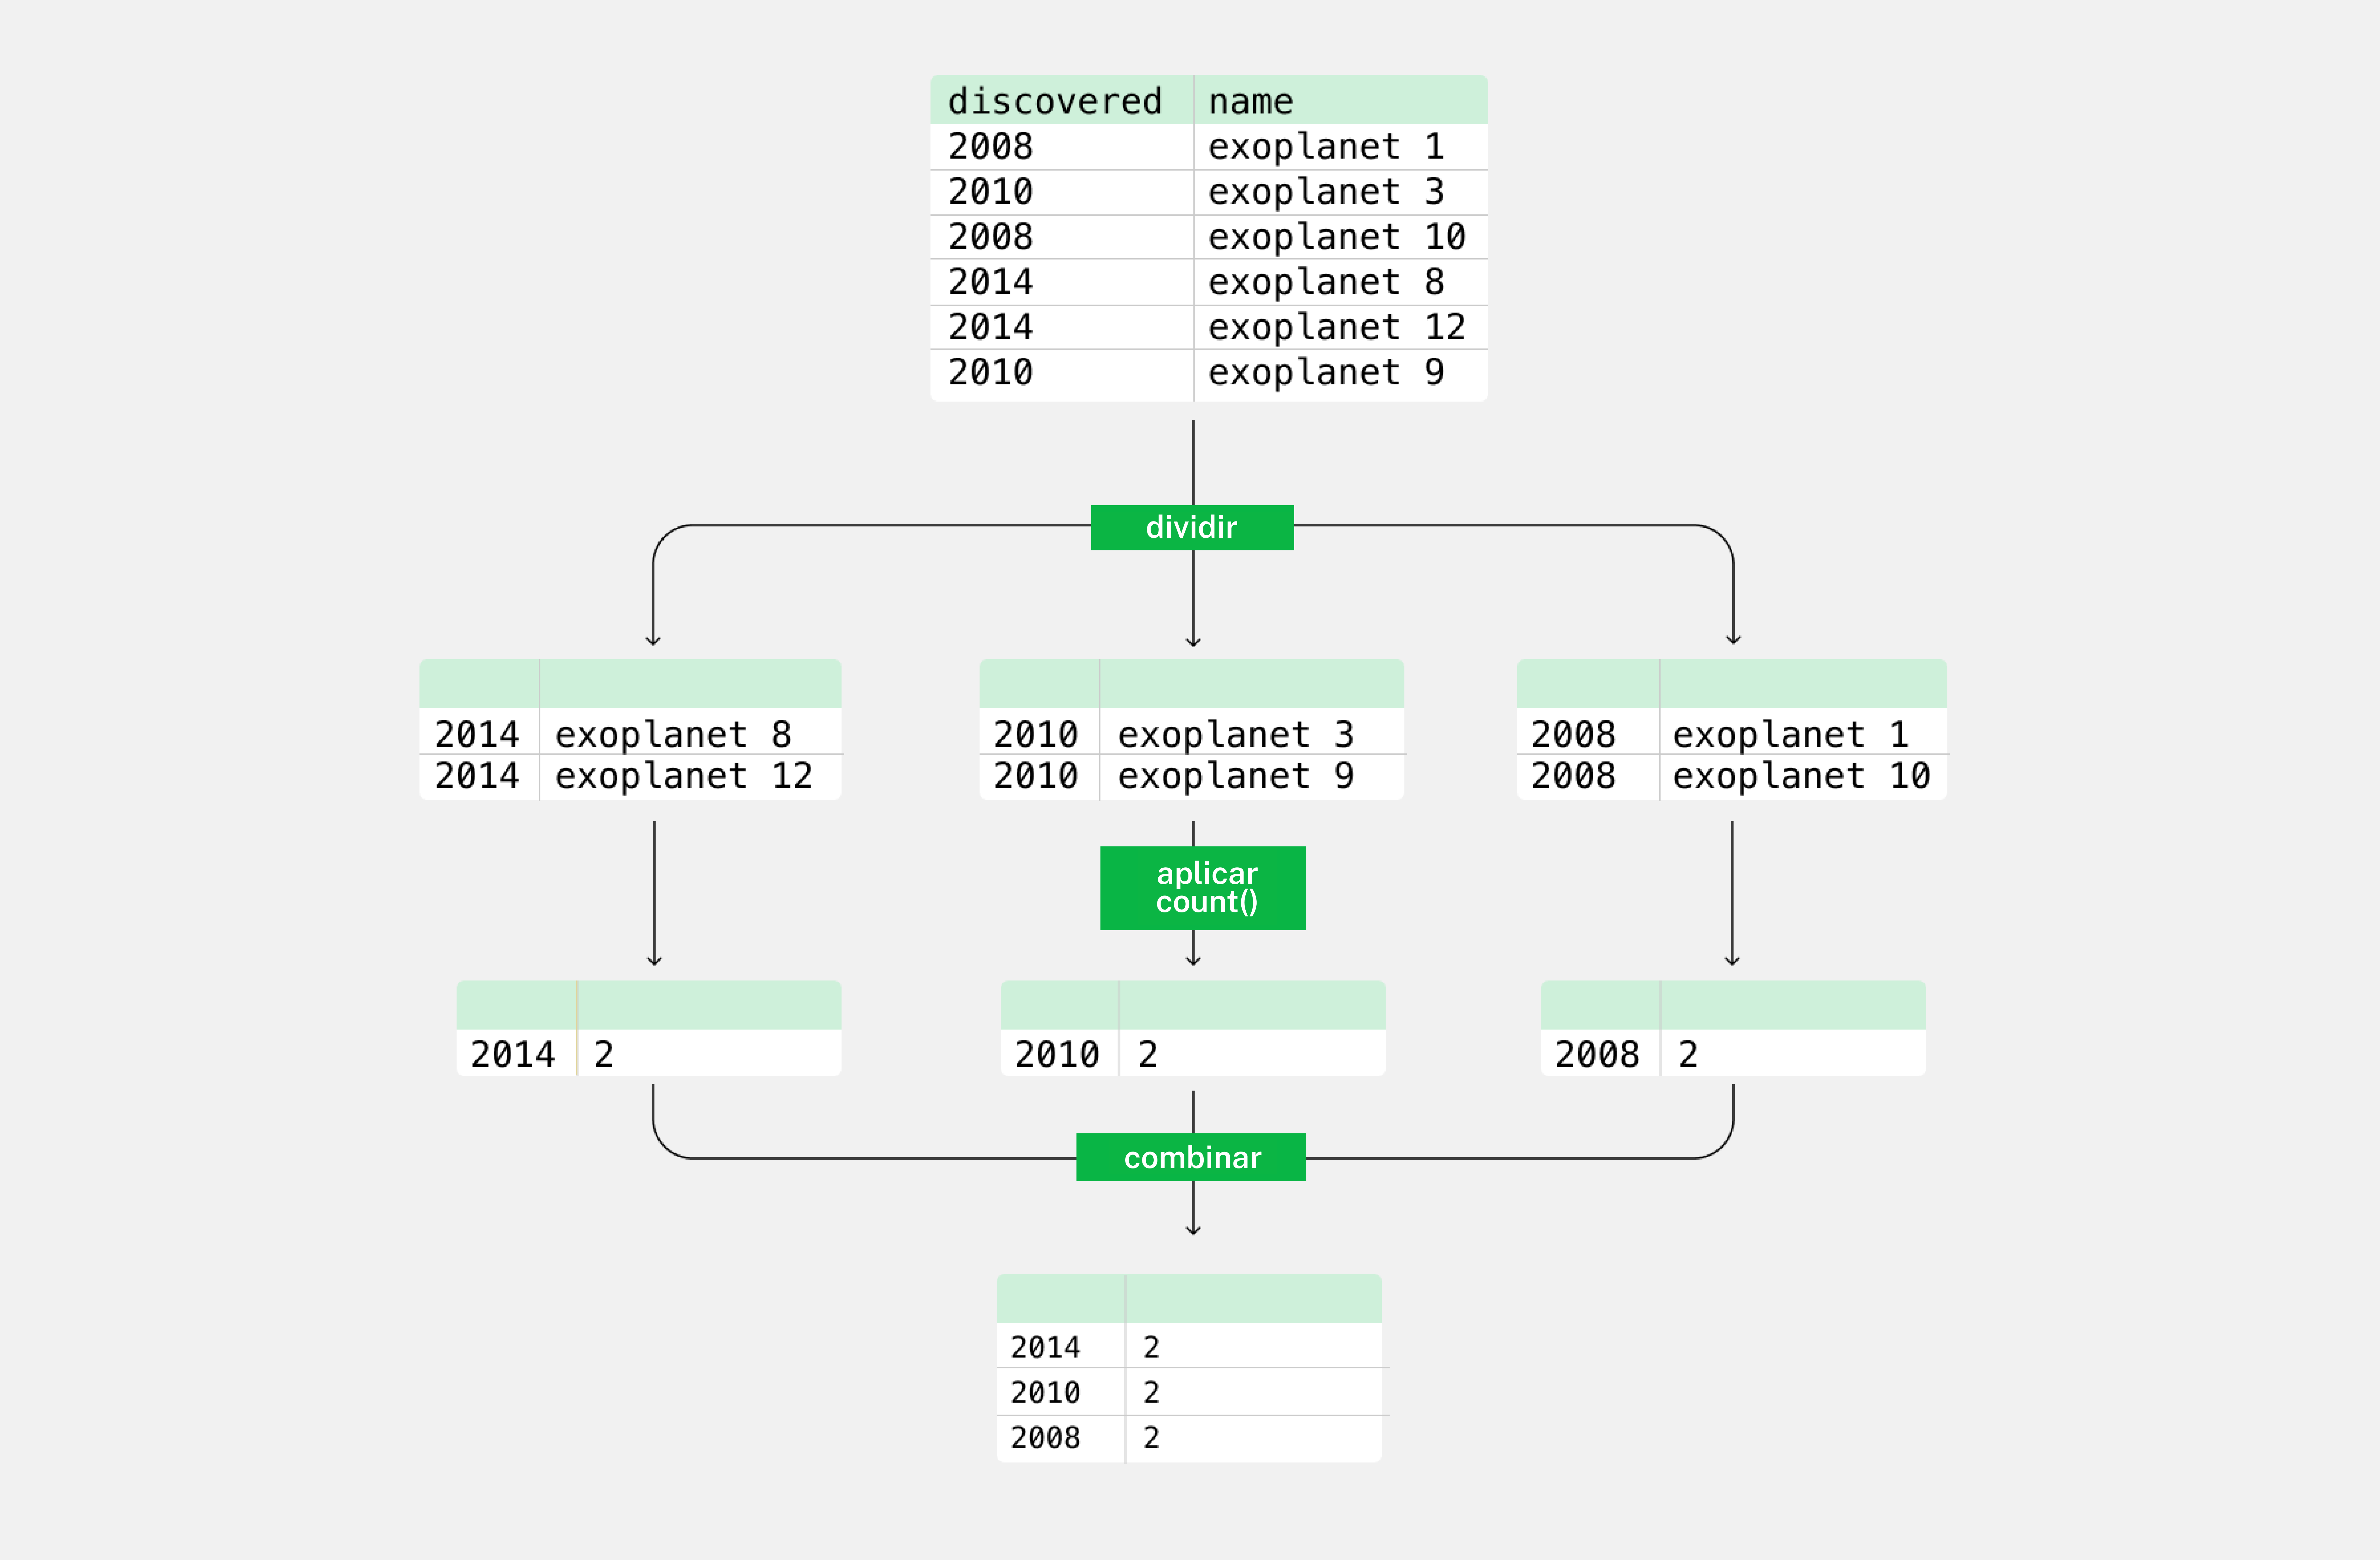

Primero, dividimos los datos en grupos por año.
Luego, aplicamos el método count() para encontrar el número de elementos en cada grupo.

Por último, guardamos el resultado como una nueva tabla en la que cada fila contiene un año y el número de exoplanetas descubiertos.
A continuación, verás cómo se ve esto en el código.

Agrupación en pandas

En pandas, agrupamos los datos utilizando el método groupby(), que hace lo siguiente:

Toma el nombre de una columna en la que se deben agrupar los datos como argumento. Este parámetro se llama by=. En nuestro caso, vamos a agrupar los datos por año de descubrimiento.

Devuelve un objeto de un tipo especial: DataFrameGroupBy. Son datos agrupados. Si les aplicas un método de pandas, se convertirán en una nueva estructura de datos.

Encontremos el número de exoplanetas agrupados por año utilizando el método count():

print(exoplanet.groupby(by='discovered'))

print() # nos dará una línea vacía entre dos impresiones

print(exoplanet.groupby(by='discovered').count())

 <pandas.core.groupby.DataFrameGroupBy object at 0x7fc1e1ca3400>

           name  mass  radius
discovered                    
1995           1     1       1
1996           1     1       1
1999           1     1       1
2000           2     2       2
2001           1     1       1
2002           1     1       1
2004           7     7       7
2005           4     4       4
2006          10    10      10
2007          19    19      19
2008          23    23      23
2009          15    15      15
2010          57    57      57
2011          95    95      95
2012          73    73      73
2013          96    96      96
2014         105   105     105

No siempre es necesario especificar el parámetro by=. Pasar el nombre de la columna funcionará exactamente de la misma manera:

print(exoplanet.groupby('discovered'))

print() # nos dará una línea vacía entre dos impresiones

print(exoplanet.groupby('discovered').count())

 <pandas.core.groupby.DataFrameGroupBy object at 0x7fc1e1ca3400>

           name  mass  radius
discovered                    
1995           1     1       1
1996           1     1       1
1999           1     1       1
2000           2     2       2
2001           1     1       1
2002           1     1       1
2004           7     7       7
2005           4     4       4
2006          10    10      10
2007          19    19      19
2008          23    23      23
2009          15    15      15
2010          57    57      57
2011          95    95      95
2012          73    73      73
2013          96    96      96
2014         105   105     105

El resultado de nuestro código es un nuevo DataFrame. Inmediatamente, podemos empezar a ver una tendencia: durante el período en cuestión la cantidad de exoplanetas descubiertos tiende a aumentar.

Si necesitas comparar observaciones usando un solo parámetro, aplica el método al objeto DataFrameGroupBy e indica la columna en cuestión, por ejemplo 'radius' .

exo_number = exoplanet.groupby('discovered')['radius'].count()
print(exo_number)

discovered
1995      1
1996      1
1999      1
2000      2
2001      1
2002      1
2004      7
2005      4
2006     10
2007     19
2008     23
2009     15
2010     57
2011     95
2012     73
2013     96
2014    105
Name: radius, dtype: int64

Obtuvimos el número de exoplanetas con radios conocidos descubiertos cada año.

Ahora que agrupamos nuestros datos, podemos comprobar cómo, por ejemplo, ha cambiado con el tiempo el radio promedio de los exoplanetas descubiertos.

Para calcular el promedio, encontraremos la suma de los radios de los exoplanetas descubiertos en un año determinado y la dividiremos entre el número de planetas, es decir, el valor que encontramos en el paso anterior.

Primero, para encontrar la suma de los radios utiliza el método sum():

exo_radius_sum = exoplanet.groupby('discovered')['radius'].sum()
print(exo_radius_sum)

discovered
1995     1.900000
1996     1.060000
1999     1.380000
2000     2.007000
2001     0.921000
2002     1.200000
2004     6.789700
2005     4.789000
2006    20.355000
2007    24.334600
2008    31.329000
2009    15.366794
2010    56.828660
2011    77.738974
2012    50.074507
2013    69.372100
2014    55.268000
Name: radius, dtype: float64

Luego, debemos dividirla entre la cantidad de exoplanetas descubiertos cada año.

exo_radius_mean = exo_radius_sum / exo_number
print(exo_radius_mean)

discovered
1995    1.900000
1996    1.060000
1999    1.380000
2000    1.003500
2001    0.921000
2002    1.200000
2004    0.969957
2005    1.197250
2006    2.035500
2007    1.280768
2008    1.362130
2009    1.024453
2010    0.996994
2011    0.818305
2012    0.685952
2013    0.722626
2014    0.526362
Name: radius, dtype: float64

La precisión de la tecnología está mejorando y se descubren exoplanetas cada vez más pequeños. ¡Realizar un análisis de grupo con groupby() puede ayudarnos a descubrir todo tipo de patrones!

Ahora puedes agrupar los datos de una manera que los comprendas mejor. Este es un comienzo sólido en el viaje de obtener conocimiento de los conjuntos de datos. Y no finaliza aquí. En la siguiente lección, veremos otra poderosa herramienta que nos ayudará en este camino, ordenar nuestros datos. ¡Apúntate!

Ejercicio 1

Utiliza el conjunto de datos music_log_raw.csv original, el cual se encuentra preprocesado con todos los problemas eliminados. Tu objetivo es agrupar este dataset mediante la columna 'genre' y contar cuántas canciones hay por género musical. 

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/music_log_processed.csv')

genre_groups = df.groupby('genre')['genre'].count()# escribe tu código aquí

print(genre_groups)

"""genre
acapella              1
acid                  2
acoustic              2
action                3
adult                26
                   ...
worldmusic            1
wort                  4
yoga                  3
şiir                  1
электроника           2
Name: genre, Length: 305, dtype: int64"""

Ejercicio 2

Calcula el tiempo total acumulado que los usuarios han pasado escuchando cada género. Para ello, debes ocupar la columna 'total_play' , la cual contiene exactamente el tiempo total que un usuario ha escuchado una canción. 

Hazlo e imprime el resultado final.

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/music_log_processed.csv')

genre_groups = df.groupby('genre')['total_play'].sum() # escribe tu código aquí

print(genre_groups)

"""genre
acapella        355.000000
acid            484.922000
acoustic        240.348163
action          511.903586
adult          2301.923250
                  ...     
worldmusic       20.000000
wort            117.139871
yoga            307.177143
şiir              2.043000
электроника       1.009000
Name: total_play, Length: 305, dtype: float64"""

Ejercicio 1

Volvamos a nuestro dataset de los Digimons. Tu objetivo será aplicar el método groupby() para dividir los Digimons en grupos según una característica común, para luego realizar cálculos de agregación sobre los Digimons. 

Debes agrupar los Digimons según su nivel (Stage), y luego aplicar sobre esta agrupación diferentes métodos de agregación para obtener la siguiente información:

El número total de Digimons por nivel.

La suma de los valores de ataque (HP) por nivel.

El promedio de los valores de velocidad (Spd) por nivel.

In [ ]:
import pandas as pd

# Cargar el archivo CSV
digimon_data = pd.read_csv('/datasets/DigiDB_digimonlist.csv')

# Agrupar los datos
grouped_stage_count = digimon_data.groupby('Stage')['Digimon'].count()
grouped_stage_sum = digimon_data.groupby('Stage')['Lv 50 HP'].sum()
grouped_stage_mean = digimon_data.groupby('Stage')['Lv50 Spd'].mean()
#Mostrar los resultados
print('Distribución de los Digimons', '\n',grouped_stage_count,'\n')
print('Total de Salud', '\n', grouped_stage_sum, '\n')
print('Promedio Nivel de Ataque', '\n', grouped_stage_mean, '\n')

"""Distribución de los Digimons 
 Stage
Armor           3
Baby            5
Champion       54
In-Training    11
Mega           74
Rookie         38
Ultimate       58
Ultra           6
Name: Digimon, dtype: int64 

Total de Salud 
 Stage
Armor            3510
Baby             3640
Champion        58700
In-Training      9290
Mega           107700
Rookie          34980
Ultimate        74640
Ultra            9050
Name: Lv 50 HP, dtype: int64 

Promedio Nivel de Ataque 
 Stage
Armor          128.666667
Baby            77.000000
Champion       103.259259
In-Training     81.181818
Mega           152.486486
Rookie          90.236842
Ultimate       122.586207
Ultra          152.833333
Name: Lv50 Spd, dtype: float64"""